# Hopfield networks

In [1]:
import numpy as np

# graphics
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from IPython.display import display, Image

So far, we have been considering neural networks with forward signal propagation. Now we will have a look at networks with **feedback**, i.e. the signal can return to previous layers or propagate "sidewise" between neurons in the same layer.

## Machs illusion

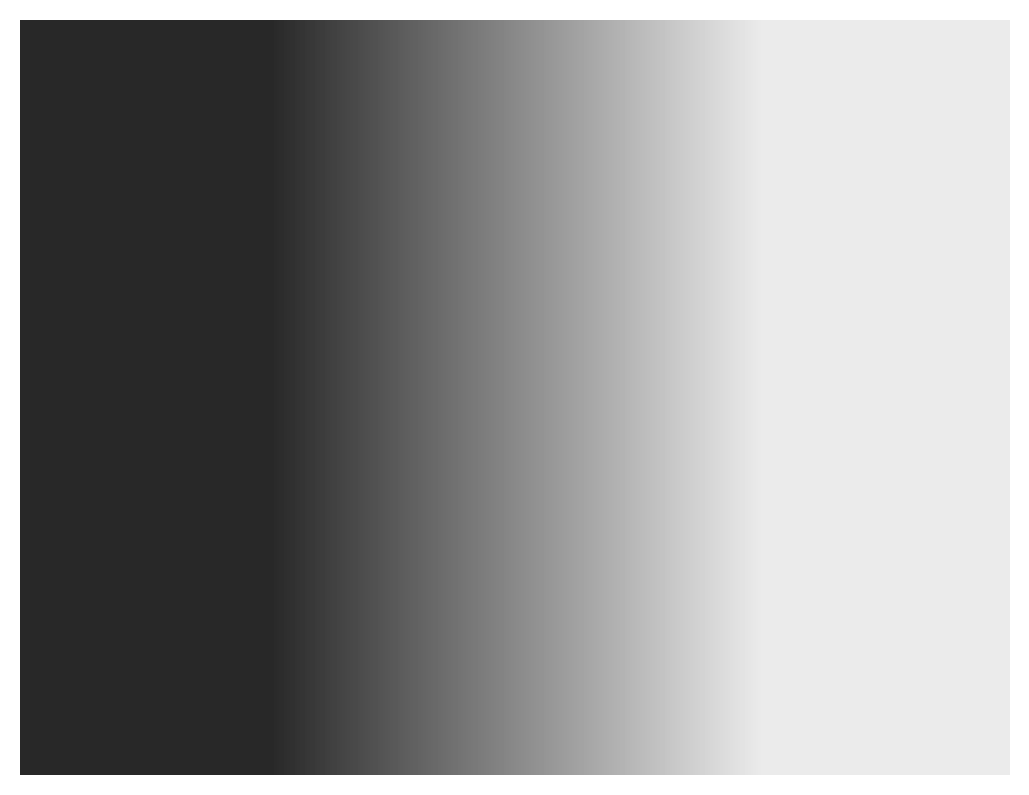

In [2]:
v0=[40 for i in range(0,99)]
v1=[i for i in range(40,235)]
v2=[235 for i in range(0,99)]

v=v0+v1+v2

H = np.array([v for i in range(0,300)])

plt.figure(figsize=(8,5),dpi=200)
plt.imshow(H,cmap='gray', vmin=0, vmax=255)
plt.axis("off");


On the other hand, the plot of "objective" intensity is as follows:

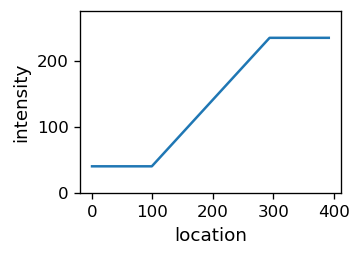

In [3]:
plt.figure(figsize=(2.8,2),dpi=120)
plt.plot(v)
plt.ylim(0,275)
plt.xlabel('location',fontsize=11)
plt.ylabel('intensity',fontsize=11);

## Hermann's illusion

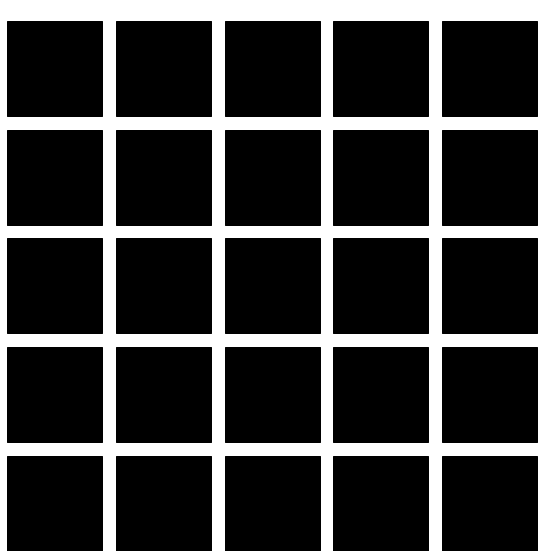

In [4]:
fig1 = plt.figure(figsize=(10,10))
b=3.5
ax1 = fig1.add_subplot(111, aspect='equal')
for i in [0,4,8,12,16]:
    for j in [0,4,8,12,16]:
        ax1.add_patch(patches.Rectangle((i,j), b, b, color='black'))

plt.ylim(0,20)
plt.xlim(0,20)
plt.axis("off");

Our cousin **horseshoe crab** will help us understand the basic mechanism behind these illusions!

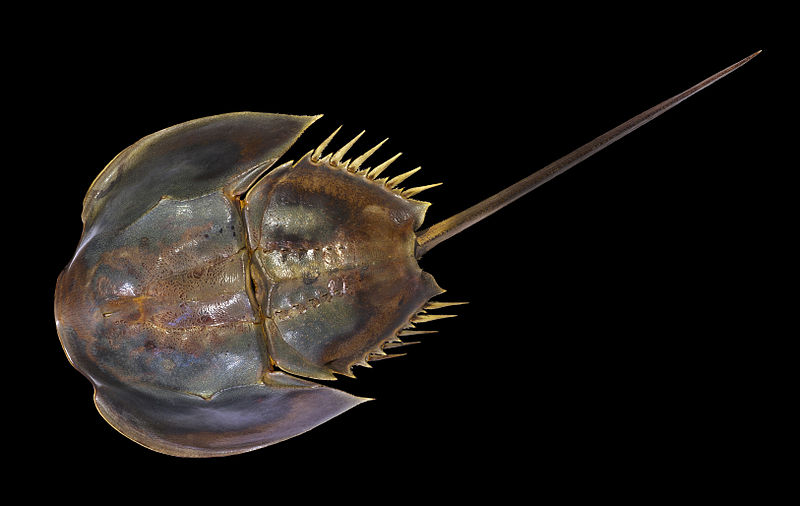

In [5]:
Image(filename="images/Limule.jpg",width=320)

Haldan Keffer Hartline (December 22, 1903 - March 17, 1983) was an American physiologist who was a cowinner (with George Wald and Ragnar Granit) of the 1967 Nobel Prize in Physiology or Medicine for his work in analyzing the neurophysiological mechanisms of vision. Hartline investigated the electrical responses of the retinas of certain arthropods, vertebrates, and mollusks because their visual systems are much simpler than those of humans and are thus easier to study. He concentrated his studies on the eye of the horseshoe crab (Limulus polyphemus). Using minute electrodes in his experiments, he obtained the first record of the electrical impulses sent by a single optic nerve fibre when the receptors connected to it are stimulated by light. He found that the photoreceptor cells in the eye are interconnected in such a way that when one is stimulated, others nearby are depressed, thus enhancing the contrast in light patterns and sharpening the perception of shapes. Hartline thus built up a detailed understanding of the workings of individual photoreceptors and nerve fibres in the retina, and he showed how simple retinal mechanisms constitute vital steps in the integration of visual information [Wikipedia].

## Hopfield networks

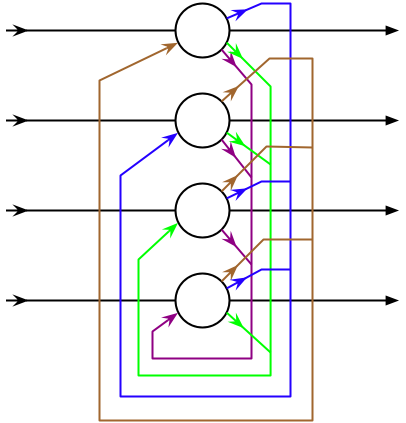

In [6]:
Image(filename="images/Hopfield-net.png",width=50)

Feedback model for $N$ neurons in the same layer (neurons in the same layer "talk to each other"). In subsequent iterations, the signal entering the neurons is (in vector notation)

$ f_ {j + 1} = f_ {j} + \varepsilon (s - W f_ {j} -f_ {j}) $,

where

$ s = (s_1, s_2, ..., s_N) $ - external input signal

$ f_j = (f_ {j, 1}, f_ {j, 2}, ..., f_ {j, N}) $ - total signal in iteration $ j $

$ W $ - matrix of coupling (damping) between neurons (symmetric, $ N \times N $)

$ \varepsilon $ - coupling parameter

Signal in subsequent iterations:

In [28]:
ns = 3*10;     # number of neurons N
b = 6;         # parameter controling the decrease of damping with distance
a = 0.2;       # magnitude of damping
iter = 20;     # number of iterations
eps = .1;      # coupling parameter

s=[0 for i in range(0,ns//3)]+[3*i/ns for i in range(0,ns//3)]+[1 for i in range(0,ns//3)]

### Collateral damping

Coupling (damping) matrix:

We will take, for example

$ W_ {ii} = $ 0,

$ W_ {ij} = - a \exp (- | i-j | / b) ~~ $ for $ i \neq j $, $ ~~ a, b> 0 $,

i.e. attenuation is strongest for close neighbors and it decreases with distance with a characteristic scale $b$.

In [16]:
W=np.array([[-a*np.exp(-np.abs(i-j)/b) for i in range(ns)] for j in range(ns)]) 
                    # exponential fall-off
for i in range(ns):
    W[i][i]=0       # no self-damping

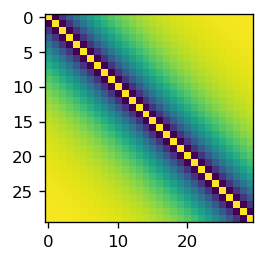

In [18]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.imshow(W);

Attenuation is strongest in dark blue areas, and weakest in yellow areas.

Iteration

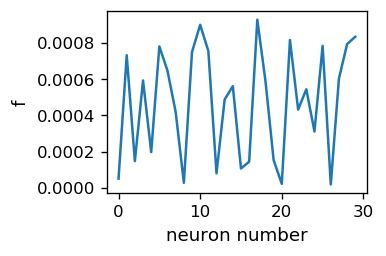

In [19]:
plt.figure(figsize=(2.8,2),dpi=120)
f = [.001*np.random.random() for _ in range(ns)]; # initial random output 
plt.plot(f)
plt.xlabel('neuron number',fontsize=11)
plt.ylabel('f',fontsize=11);

In [20]:
def it(f):
    f+= eps*(s + np.dot(W,f) - f)
    return f

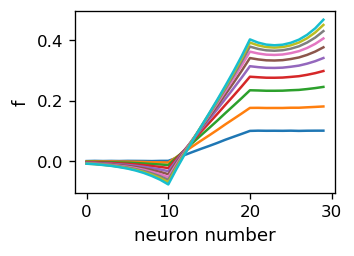

In [21]:
plt.figure(figsize=(2.8,2),dpi=120)
plt.xlabel('neuron number',fontsize=11)
plt.ylabel('f',fontsize=11)

for k in range(10):
    f=it(f)
    plt.plot(f)


"Spouts" appear where the initial signal $s$ (see below) varies. It is the result of coupling (suppression) of neighboring neurons.

As can be seen from our horseshoe crab eye model, the flat portions of the input signal $ s $ are mapped with considerable distortion. This qualitatively corresponds to Mach's illusion. In particular, for $ i = $ 10 we have a minimum (lightest "bar"), and for $ i = $ 20 (local) we have a maximum (dark bar). Thus, the presented simple model of negative collateral feedback between the retinal receptors is sufficient to explain the phenomenon qualitatively.

For the steady state (i.e. after many iterations) the output signal does not change, i.e. we have $ f_ {j + 1} = f_j = f $, so
 
$ s + W f - f = $ 0,

$ s + (W-1) f = $ 0,

$ (1-W) f = s $,

which can we solve for $ f $:

$ f = (1-W) ^ {- 1} s $. 


In [23]:
np.identity(ns)-W;  # 1-W

In [24]:
np.linalg.inv(np.identity(ns)-W);  # inverse matrix

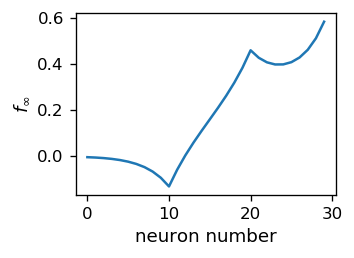

In [26]:
finf=np.dot(np.linalg.inv(np.identity(ns)-W),s)

plt.figure(figsize=(2.8,2),dpi=120)

plt.plot(finf)
plt.xlabel('neuron number',fontsize=11)
plt.ylabel('$f_\infty$',fontsize=11);

Why does Nature go to so much trouble and, as a result, our senses “deceive us?” This is because the same image processing engine leads to increased contrast / visual acuity.

Another sample signal

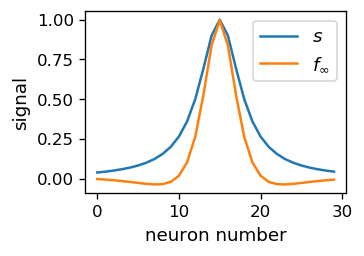

In [27]:
s2 = np.array([3**2/((i - ns/2)**2 + 3**2) for i in range(ns)])

finf2=np.dot(np.linalg.inv(np.identity(ns)-W),s2)
plt.figure(figsize=(2.8,2),dpi=120)

plt.plot(s2)
plt.plot(1.5*finf2)
plt.legend(('$s$','$f_\infty$'),fontsize=11)
plt.xlabel('neuron number',fontsize=11)
plt.ylabel('signal',fontsize=11);

The obtained signal (yellow line) is narrower than the original (blue line), so the network made a useful correction / sharpening of the image. The cost of this advantageous feature is the appearance of an illusion, which is clearly a "distortion".

## Explanation of Hermann's illusion

based on collateral damping

http://www.yorku.ca/eye/hermann1.htm

In [ ]:
Image(filename="images/hermann1.gif",width=400)

To understand the receptive field explanation for the Hermann grid illusion requires a basic understanding of receptive fields.

Once again, it is a matter of lateral inhibition between the center and surround of the receptive field. Note the lower right part of the diagram. The receptive field that lies at the intersection of the white cross has more light falling on its inhibitory surround than does the receptive field that lies between the two black squares. Consequently, the excitatory center of this receptive field between the squares yields a stronger response than that which lies at the intersection of the white cross. This explanation is appropriate for those circumstances where the receptive fields are larger than the spaces between the squares.

Receptive fields in the central fovea are much smaller than in the rest of the retina. This is represented in the upper right of the diagram. In the Hermann grid you probably did not see a dark area when you looked directly at the intersection of the white cross, but did see dark areas in your peripheral vision. To prove to yourself that this is not some trick, just get up and walk away from your computer screen. When you are at some distance from it, you will undoubtedly notice that the dark blob is visible even at your fixation point. I leave it to you to figure out why this happens. 

## Other illusions

In [ ]:
Image(filename="images/balls.png",width=500)

In [ ]:
Image(filename="images/leafwave.jpg",width=750)

In [ ]:
Image(filename="images/rotsnake.gif",width=750)

Understanding the brain by analyzing delusions!

https://www.pcmag.com/news/21-optical-illusions-that-prove-your-brain-sucks

https://michaelbach.de/ot/